In [1]:
using Pkg
Pkg.activate("..")
using ElementalFunctionsTests

  Activating project at `~/Documents/Academia/taylor/ElementalFunctionsTests`


In [2]:
using JSON
import Unmarshal
using Plots
using Printf
using PrettyTables
include("setupPlots.jl")

setupLabels (generic function with 1 method)

In [3]:
function inrange(x, a=-Inf, b=Inf)
    return a < x ≤ b
end

inrange (generic function with 3 methods)

In [4]:
function filterResults(errors, a, b)
    return filter((x)->inrange(abs(x.maxError.err),a, b), errors)
end

filterResults (generic function with 1 method)

In [5]:
function howManyFloats(x::Float32, y::Float32)
    function toInt(z)
        Int64(reinterpret(Int32, z))
    end
    if x < y 
        x, y = y, x 
    end
    # x >= y
    if y >= 0 
        return toInt(x) - toInt(y)
    elseif x == 0
        return toInt(y) - toInt(Float32(-0.0))
    elseif x < 0
         return toInt(y) - toInt(x)
    else 
        return toInt(y) - toInt(Float32(-0.0)) +
            toInt(x) - toInt(Float32(0.0))
    end
end

howManyFloats (generic function with 1 method)

In [6]:
default(size=(900,900))
function logtolerant(arr)
    map(x-> x != 0 ? x : 0.0001, arr)
end

logtolerant (generic function with 1 method)

# Float32

In [7]:
Unmarshal.unmarshal(T::Type{ElementalFunctionsTests.AbstractError}, x::Error32, verbose::Bool, verboseLvl::Int64) = x
Unmarshal.unmarshal(T::Type{StepRangeLen}, br::Vector{Any}, verbose::Bool, verboseLvl::Int64) =  range(first(br), last(br), length=length(br))
function Unmarshal.unmarshal(DT::Type{ElementalFunctionsTests.AbstractError}, parsedJson::Dict{String, Any}, verbose::Bool, verboseLvl::Int64)
    parsedJson["x"] = eval(Meta.parse(parsedJson["x"])) 
    return Unmarshal.unmarshal(Error32, parsedJson)
end

In [8]:
F32 = JSON.parsefile("Float32Errors.json")
F32 = Unmarshal.unmarshal(Array{TestsResults}, F32)
nothing

In [11]:
p = vcat(
        sort(
            map(foo->begin 
                return [foo.f @sprintf("%a", foo.maxError.x) foo.maxError.err]
            end, F32), 
        by=x->abs(x[3]), rev=true)...
)
pretty_table(p, header=(["función", "x", "err"], ["", "MaxError",  "MaxError"]))#, backend = Val(:latex))

┌─────────┬──────────────────┬────────────┐
│ función │                x │        err │
│         │         MaxError │   MaxError │
├─────────┼──────────────────┼────────────┤
│   expm1 │    -0x1.62e43p-1 │ -2.2518e15 │
│    cosh │   -0x1.657b14p+6 │    2.41409 │
│    sinh │   -0x1.657b14p+6 │   -2.41409 │
│   acosh │    0x1.01fbc2p+0 │    1.99449 │
│   atanh │   -0x1.fecb7ep-8 │   -1.94114 │
│     cot │  -0x1.03b15p+115 │    1.79663 │
│   asinh │   -0x1.ec845ap-4 │    1.52777 │
│     csc │  -0x1.0d71cap+24 │   -1.49809 │
│     sec │ -0x1.fcef4cp+112 │    1.49722 │
│    tanh │    -0x1.010bap-3 │    1.36637 │
│   exp10 │    0x1.05b448p+2 │    1.04779 │
│    acos │   -0x1.003782p-1 │  -0.917925 │
│     exp │    0x1.ab0a1ep+4 │   0.893469 │
│    exp2 │   -0x1.f9b048p+6 │   0.874761 │
│    atan │   -0x1.626772p-1 │  -0.852108 │
│     tan │  -0x1.e1d864p+35 │   0.799857 │
│    asin │   -0x1.00600ep-1 │   0.729891 │
│   log10 │    0x1.10de02p+0 │  -0.586695 │
│    log2 │    0x1.14d9fep+0 │  

In [10]:
p = vcat(
        sort(
            map(foo->begin 
                batchsize = howManyFloats(Float32.(domain(Symbol(foo.f)))...)
                incorrectos = (sum(foo.buckets[1:15]) + sum(foo.buckets[26:40]))/batchsize*100
                ulp2 = (sum(foo.buckets[1:5]) + sum(foo.buckets[36:40])) / batchsize*100 
                return [foo.f incorrectos ulp2]
            end, F32), 
        by=x->x[2], rev=true)...
)
pretty_table(p, header=["función", "P(err=1 ULP)", "P(err=2 ULP)"], backend = Val(:latex))

\begin{tabular}{rrr}
  \hline
  \textbf{función} & \textbf{P(err=1 ULP)} & \textbf{P(err=2 ULP)} \\\hline
  acosh & 22.6522 & 0.000129174 \\
  cot & 16.0114 & 0.0339285 \\
  asinh & 12.5916 & 6.07734e-7 \\
  csc & 12.3462 & 0.0 \\
  sec & 12.1118 & 0.0 \\
  tan & 7.10156 & 0.0 \\
  atanh & 4.96604 & 0.00348523 \\
  tanh & 1.00686 & 0.0 \\
  cosh & 0.435092 & 0.000123931 \\
  sinh & 0.378069 & 0.000123931 \\
  exp10 & 0.366171 & 0.0 \\
  exp & 0.300647 & 0.0 \\
  acos & 0.26835 & 0.0 \\
  exp2 & 0.261148 & 0.0 \\
  asin & 0.196959 & 0.0 \\
  atan & 0.151537 & 0.0 \\
  cos & 0.0151371 & 0.0 \\
  expm1 & 0.0150492 & 0.0 \\
  sin & 0.0146116 & 0.0 \\
  log1p & 0.00843449 & 0.0 \\
  log10 & 0.00504634 & 0.0 \\
  log2 & 0.0050304 & 0.0 \\
  log & 0.00501277 & 0.0 \\
  cospi & 0.00258235 & 0.0 \\
  sinpi & 0.00199014 & 0.0 \\\hline
\end{tabular}


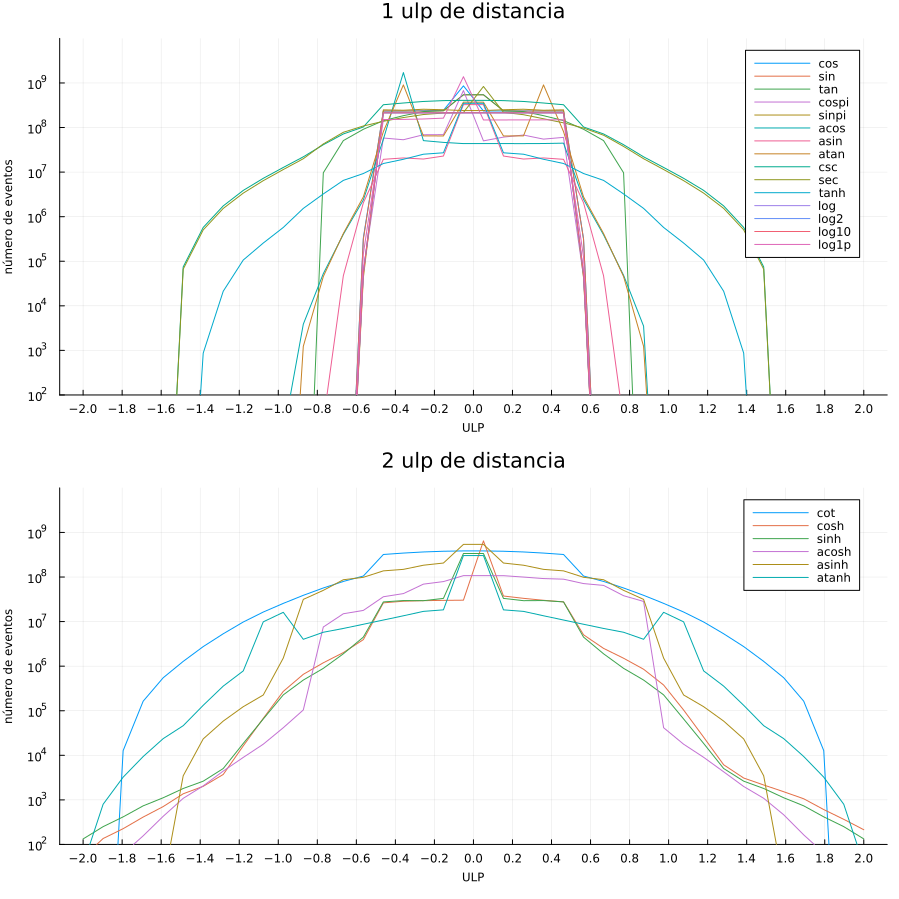

In [318]:
ulp1 = filterResults(F32, 0.5, 1.5)
ulp2 = filterResults(F32, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ]
p2 = plot(r, logtolerant(setupBuckets(ulp1)), label=setupLabels(ulp1))
title!("1 ulp de distancia")
p3 = plot(r, logtolerant(setupBuckets(ulp2)), label=setupLabels(ulp2))
title!("2 ulp de distancia")
p = plot(p2, p3, layout = l, xticks = -2:0.2:2, size=(900,900),  guidefont=font(8), yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10))
xlabel!("ULP")
ylabel!("número de eventos")
# savefig("images/hist_F32.png")
p

In [320]:
bar(r, 
        label=string(F32[15].f), 
        logtolerant(F32[15].buckets),  
        # size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10.2), 
        color=palette(:default)[8])
savefig("images/acosh_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/acosh_F32.png"

In [341]:
bar(r, 
        label=string(F32[16].f), 
        logtolerant(F32[16].buckets),  
        # size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10), 
        color=palette(:default)[4])
savefig("images/asinh_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/asinh_F32.png"

In [342]:
bar(r, 
        label=string(F32[9].f), 
        logtolerant(F32[9].buckets),  
        # size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10), 
        color=palette(:default)[9])
savefig("images/csc_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/csc_F32.png"

In [303]:
bar(r, 
        label=string(F32[10].f), 
        logtolerant(F32[10].buckets),  
        # size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10), 
        color=palette(:default)[10])
savefig("images/sec_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/sec_F32.png"

In [302]:
bar(r, 
        label=string(F32[11].f), 
        logtolerant(F32[11].buckets),  
        # size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10), 
        color=palette(:default)[1])
savefig("images/cot_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/cot_F32.png"

In [346]:
bar(r, 
        label=string(F32[8].f), 
        logtolerant(F32[8].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10),
        color=palette(:default)[8])
savefig("images/atan_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/atan_F32.png"

In [345]:
e = bar(r, 
        label=string(F32[17].f), 
        logtolerant(F32[17].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10), 
        color=palette(:default)[6])
savefig("images/atanh_F32.png")

"/Users/davidvalencia/Documents/Academia/taylor/ElementalFunctionsTests/experiments/images/atanh_F32.png"

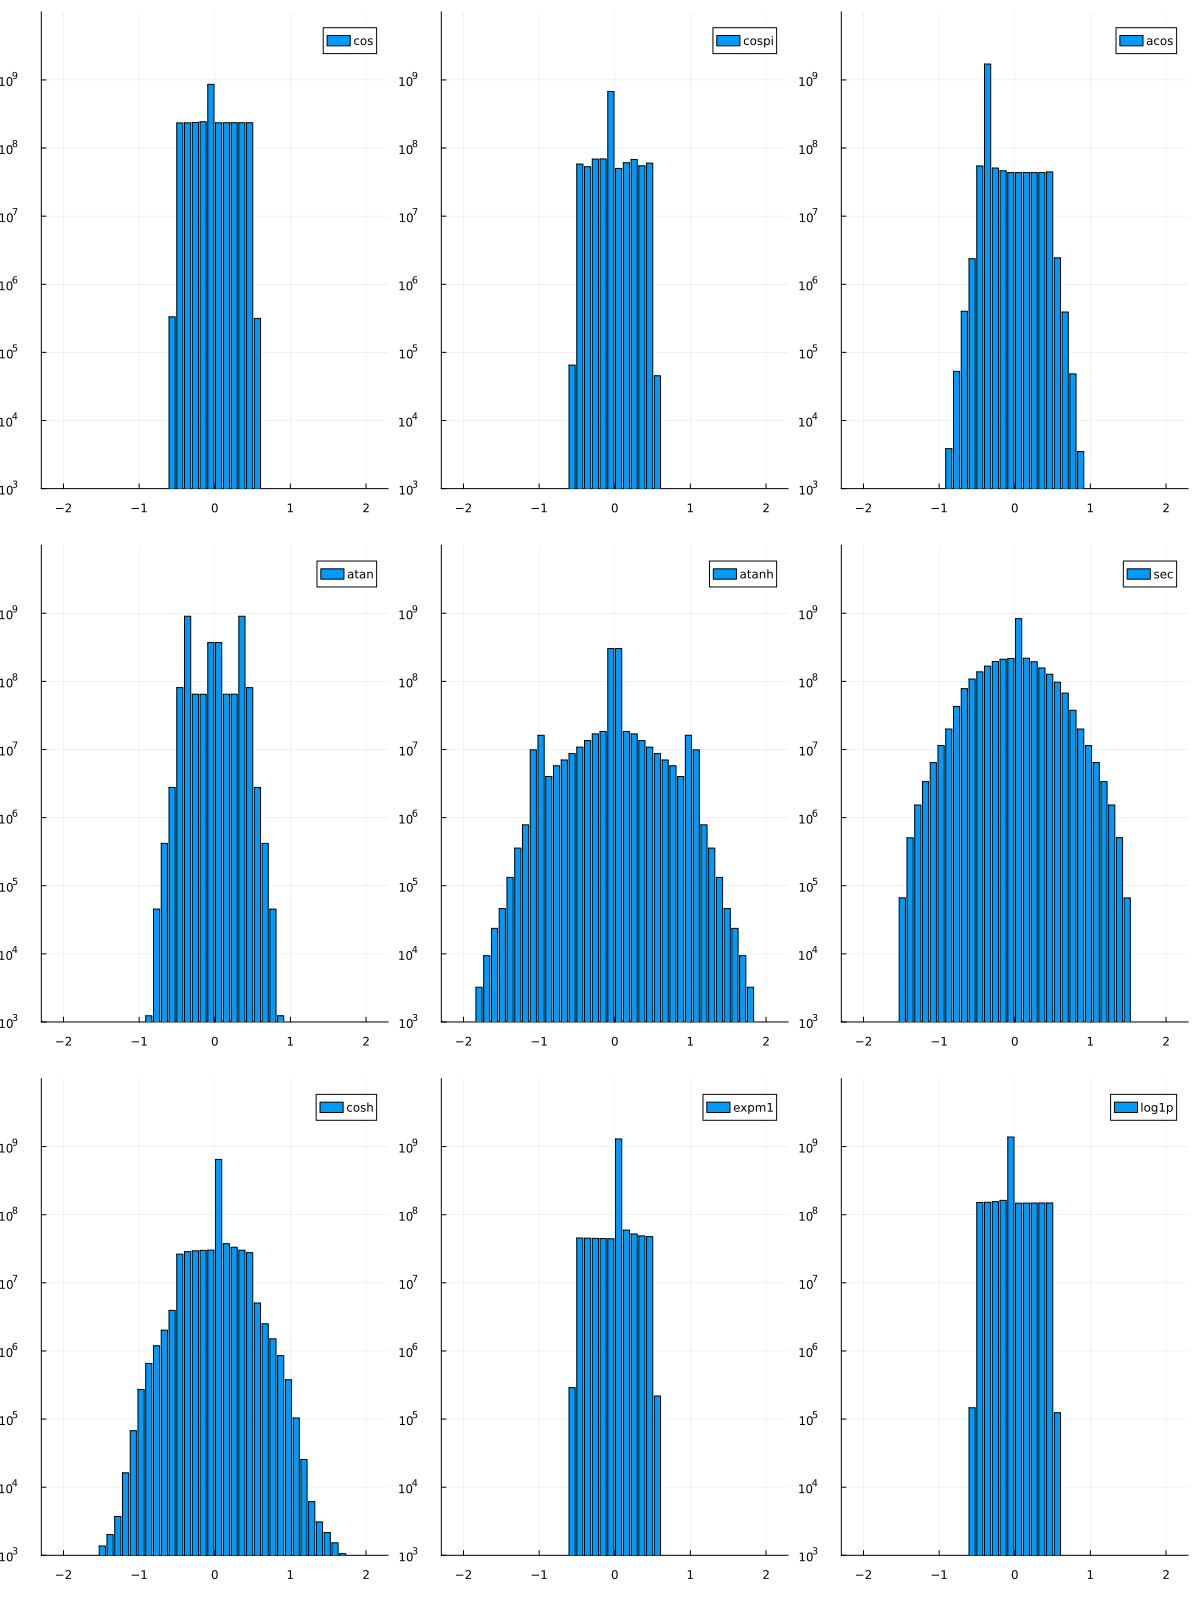

In [255]:
a = bar(r, 
        label=string(F32[1].f), 
        logtolerant(F32[1].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
b = bar(r, 
        label=string(F32[4].f), 
        logtolerant(F32[4].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
c = bar(r, 
        label=string(F32[6].f), 
        logtolerant(F32[6].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
d = bar(r, 
        label=string(F32[8].f), 
        logtolerant(F32[8].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
e = bar(r, 
        label=string(F32[17].f), 
        logtolerant(F32[17].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
f = bar(r, 
        label=string(F32[10].f), 
        logtolerant(F32[10].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
g = bar(r, 
        label=string(F32[12].f), 
        logtolerant(F32[12].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
h = bar(r, 
        label=string(F32[19].f), 
        logtolerant(F32[19].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
i = bar(r, 
        label=string(F32[25].f), 
        logtolerant(F32[25].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))
j = bar(r, 
        label=string(F32[15].f), 
        logtolerant(F32[15].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(1:9), ylims=(10^3, 10^10))

l = @layout [a b c; d e f; g h i ]
plot(a, b, c, d, e, f, g, h, i, layout = l, size=(1200, 1600))


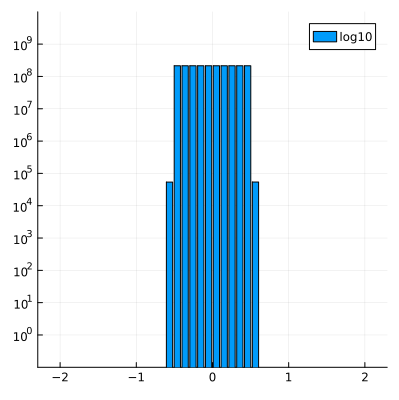

In [314]:
bar(r, 
        label=string(F32[24].f), 
        logtolerant(F32[24].buckets),  
        size=(400,400),   
        yscale=:log10, yticks=exp10.(0:9), ylims=(10^-1, 10^10))

# Float64

In [102]:
Unmarshal.unmarshal(T::Type{ElementalFunctionsTests.AbstractError}, x::Error, verbose::Bool, verboseLvl::Int64) = x
Unmarshal.unmarshal(T::Type{StepRangeLen}, br::Vector{Any}, verbose::Bool, verboseLvl::Int64) =  range(first(br), last(br), length=length(br))
function Unmarshal.unmarshal(DT::Type{ElementalFunctionsTests.AbstractError}, parsedJson::Dict{String, Any}, verbose::Bool, verboseLvl::Int64)
    parsedJson["x"] = eval(Meta.parse(parsedJson["x"])) 
    return Unmarshal.unmarshal(Error, parsedJson)
end

### Distribución de números flotantes

In [103]:
RFD = JSON.parsefile("Float64Errors_FloatDistribution.json")
RFD = Unmarshal.unmarshal(Array{TestsResults}, RFD)
nothing

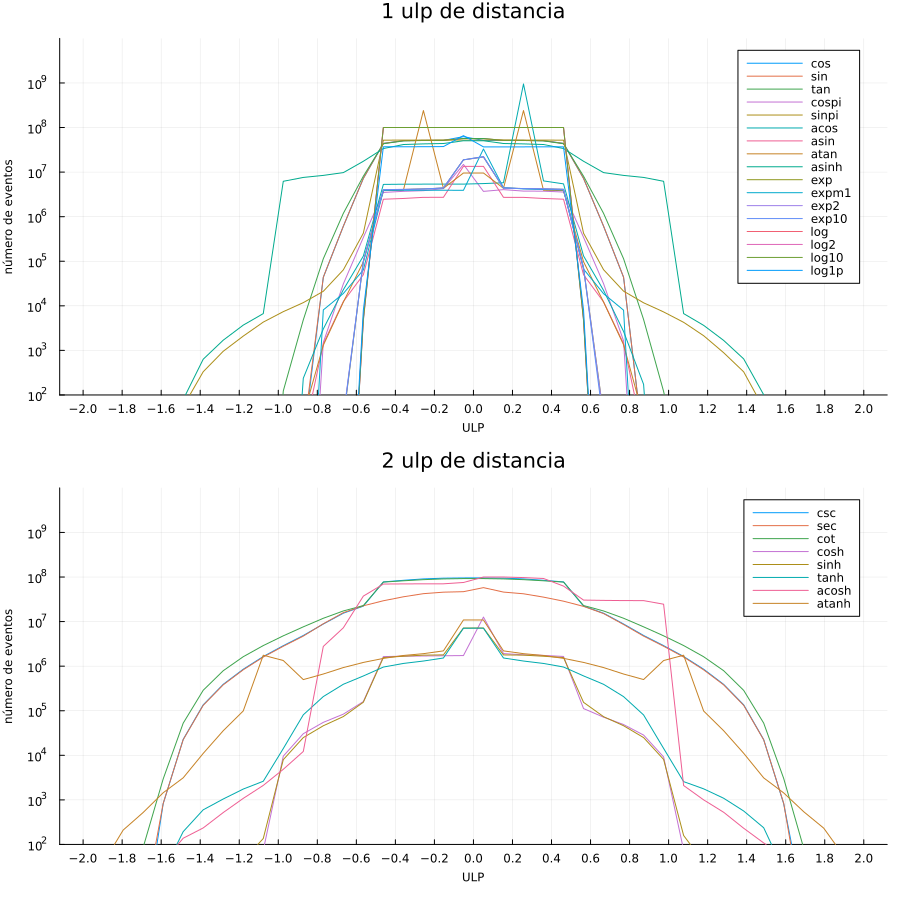

In [104]:
correct = filterResults(RFD, prevfloat(0.0), 0.5)
ulp1 = filterResults(RFD, 0.5, 1.5)
ulp2 = filterResults(RFD, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ]
p2 = plot(r, logtolerant(setupBuckets(ulp1)), label=setupLabels(ulp1))
title!("1 ulp de distancia")
p3 = plot(r, logtolerant(setupBuckets(ulp2)), label=setupLabels(ulp2))
title!("2 ulp de distancia")
p = plot(p2, p3, layout = l, xticks = -2:0.2:2, size=(900,900),  guidefont=font(8), yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10))
xlabel!("ULP")
ylabel!("número de eventos")
savefig("images/hist_RFD.png")
p

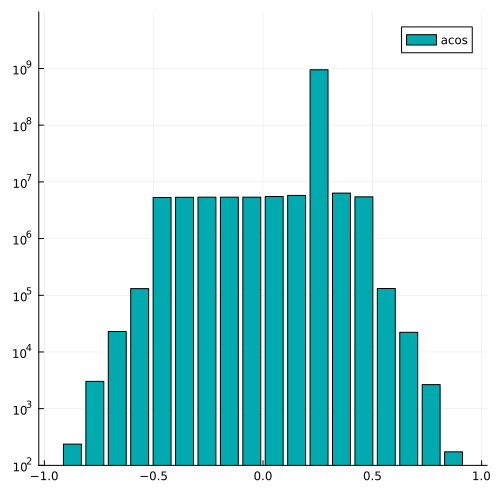

In [169]:
lupa = 12:29 
p = bar(r[lupa], RFD[6].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10), size=(500,500), label="acos", color=palette(:default)[6])
savefig("images/acos_RFD")
p

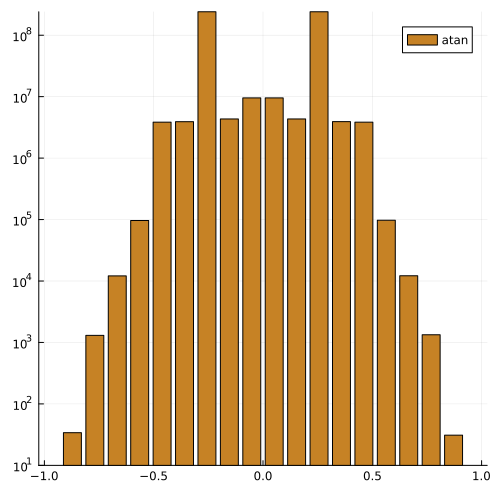

In [170]:
lupa = 12:29 
p = bar(r[lupa], RFD[8].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), size=(500,500), label="atan", color=palette(:default)[8])
savefig("images/atan_RFD")
p

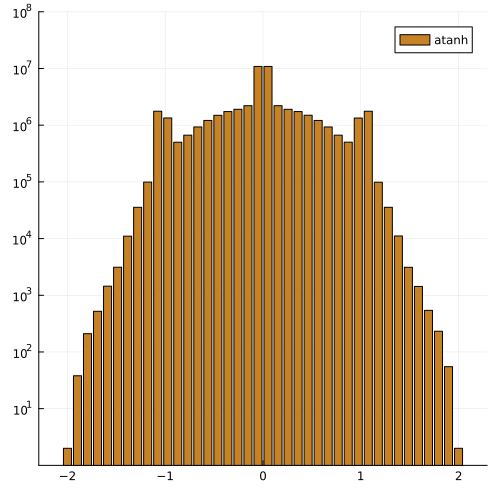

In [171]:
p = bar(r, RFD[17].buckets, size=(500,500),  yscale=:log10, yticks=exp10.(1:9), ylims=(1, 10^8), label="atanh", color=palette(:default)[8])
savefig("images/atanh_RFD")
p

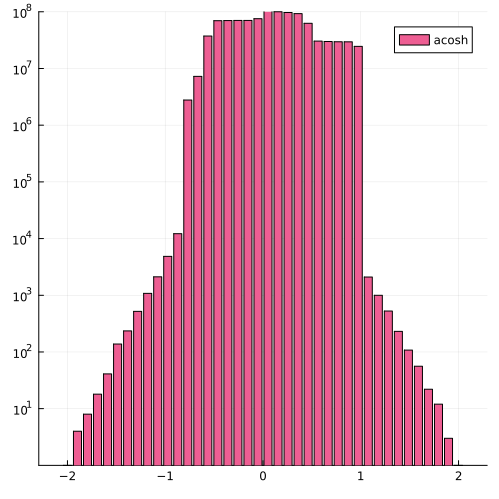

In [172]:
p = bar(r, RFD[15].buckets, size=(500,500),  yscale=:log10, yticks=exp10.(1:9), ylims=(1, 10^8), label="acosh", color=palette(:default)[7])
savefig("images/acosh_RFD")
p

### Probabilidad de error

In [33]:
p = vcat(
        sort(
            map(foo->begin 
                incorrectos = (sum(foo.buckets[1:15]) + sum(foo.buckets[26:40]))/foo.batchsize*100
                ulp2 = (sum(foo.buckets[1:5]) + sum(foo.buckets[36:40])) / foo.batchsize*100 
                return [foo.f incorrectos ulp2]
            end, RFD), 
        by=x->x[2], rev=true)...
)
pretty_table(p, header=["función", "P(err=1 ULP)", "P(err=2 ULP)"])#, backend = Val(:latex))


┌─────────┬──────────────┬──────────────┐
│ función │ P(err=1 ULP) │ P(err=2 ULP) │
├─────────┼──────────────┼──────────────┤
│   acosh │      19.1439 │      1.66e-5 │
│     cot │      14.0448 │     0.000613 │
│     csc │      11.4682 │    0.0001643 │
│     sec │      11.4111 │     0.000167 │
│   asinh │      9.90046 │          0.0 │
│     tan │      1.88146 │          0.0 │
│     sin │      1.57756 │          0.0 │
│     cos │      1.57625 │          0.0 │
│   atanh │      1.31265 │    0.0004481 │
│    tanh │     0.261047 │       5.0e-6 │
│   sinpi │     0.107718 │          0.0 │
│   cospi │    0.0751822 │          0.0 │
│    sinh │    0.0616022 │       1.3e-6 │
│    cosh │    0.0610112 │       1.3e-6 │
│    acos │    0.0313909 │          0.0 │
│    atan │    0.0221029 │          0.0 │
│   expm1 │    0.0184198 │          0.0 │
│   exp10 │    0.0171507 │          0.0 │
│    exp2 │    0.0170936 │          0.0 │
│     exp │    0.0170447 │          0.0 │
│    asin │    0.0127216 │        

## Sección Gamma

In [86]:
γ = JSON.parsefile("Float64Errors_GammaSection.json")
γ = Unmarshal.unmarshal(Array{TestsResults}, γ)
nothing

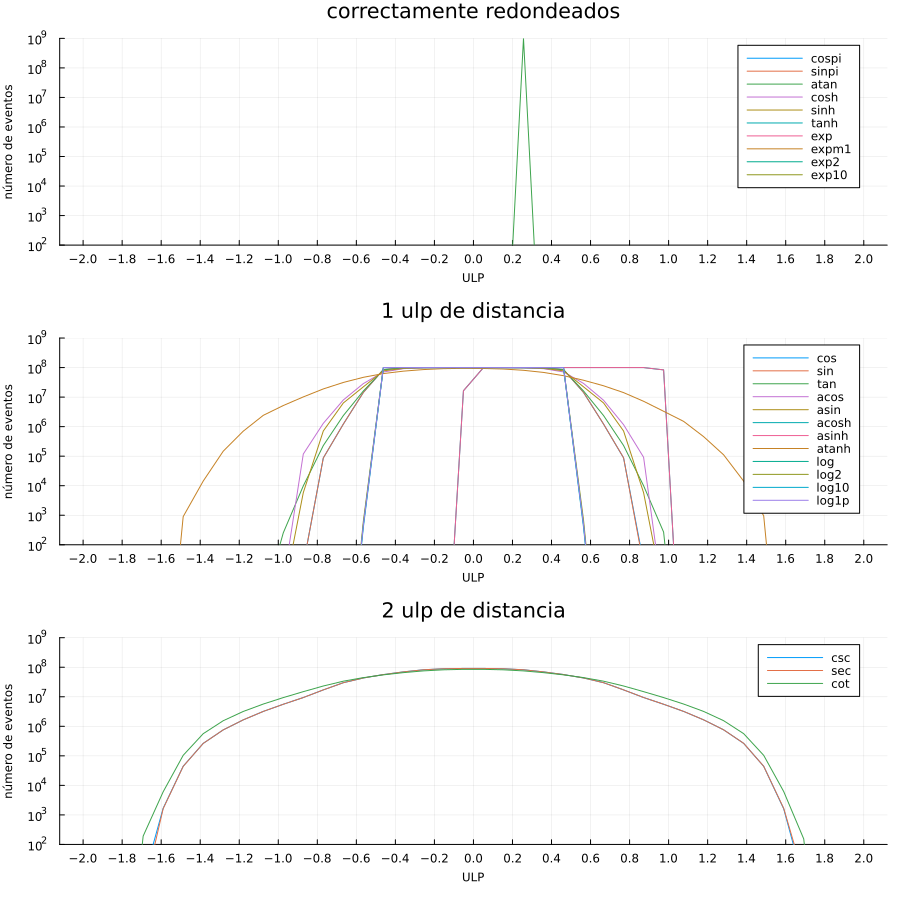

In [228]:
correct = filterResults(γ, prevfloat(0.0), 0.5)
ulp1 = filterResults(γ, 0.5, 1.5)
ulp2 = filterResults(γ, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ; c]
p1 = plot(r, logtolerant(setupBuckets(correct)), label=setupLabels(correct))
title!("correctamente redondeados")
p2 = plot(r, logtolerant(setupBuckets(ulp1)), label=setupLabels(ulp1))
title!("1 ulp de distancia")
p3 = plot(r, logtolerant(setupBuckets(ulp2)), label=setupLabels(ulp2))
title!("2 ulp de distancia")
p = plot(p1, p2, p3, layout = l,  guidefont=font(8), xticks = -2:0.2:2,yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^9)) 
xlabel!("ULP")
ylabel!("número de eventos")
savefig("images/hist_gamma.png")
p

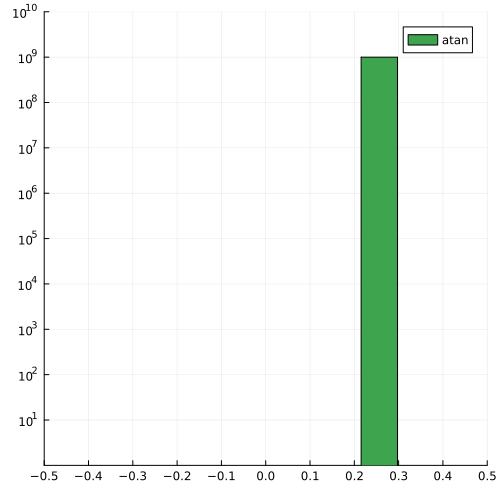

In [168]:
p = bar(r, logtolerant(γ[8].buckets), 
    size=(500,500), 
    xticks = -0.5:0.1:0.5, xlims=(-0.5, 0.5),  
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^10), 
    label="atan", 
    color=palette(:default)[3])
savefig("images/atan_gamma")
p

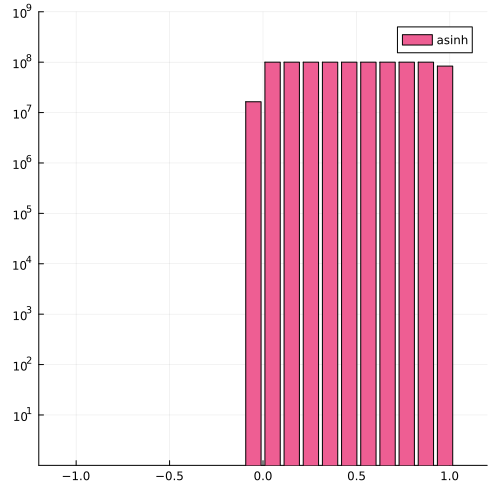

In [211]:
p = bar(r, 
    logtolerant(γ[16].buckets), 
    size=(500,500), 
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^9), 
    xlims=(-1.2, 1.2),
    label="asinh", 
    color=palette(:default)[7])
savefig("images/asinh_gamma")
p

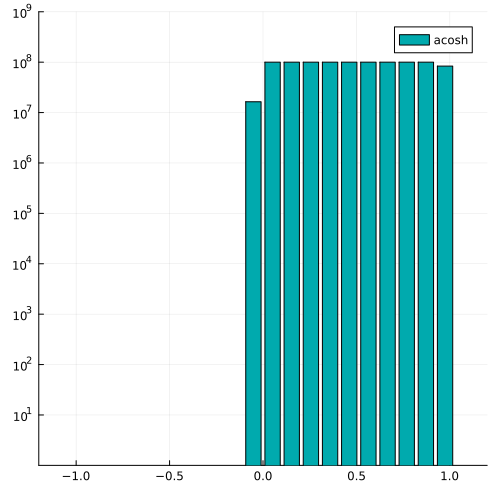

In [212]:
p = bar(r, 
    logtolerant(γ[15].buckets), 
    size=(500,500), 
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^9), 
    xlims=(-1.2, 1.2),
    label="acosh", 
    color=palette(:default)[6])
savefig("images/acosh_gamma")
p

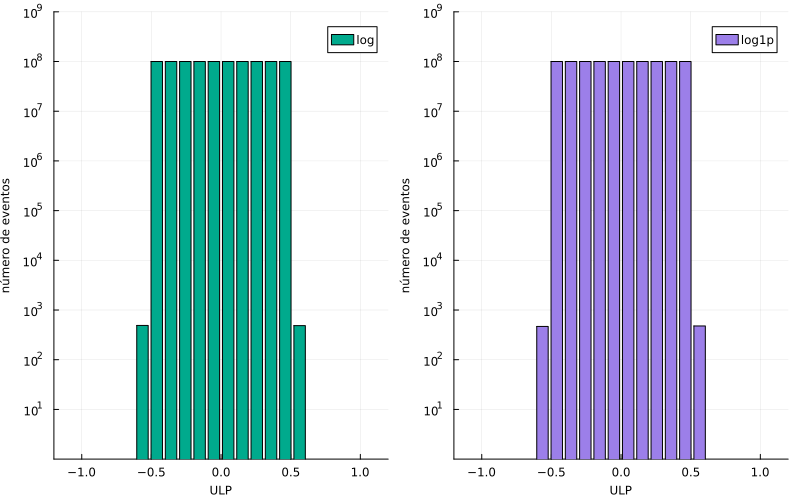

In [232]:
p1 = bar(r, 
    logtolerant(γ[22].buckets), 
    size=(400,500), 
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^9), 
    xlims=(-1.2, 1.2),
    label="log", 
    color=palette(:default)[9])
p2 = bar(r, 
    logtolerant(γ[25].buckets), 
    size=(400,500), 
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^9), 
    xlims=(-1.2, 1.2),
    label="log1p", 
    color=palette(:default)[12])
r =  range(-2, 2, length=40)
l = @layout [a b]
p = plot(p1, p2, layout = l, size=(800,500), guidefont=font(8), yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^9), 
    xlims=(-1.2, 1.2),) 
xlabel!("ULP")
ylabel!("número de eventos")
savefig("images/log&log1p_gamma.png")
p


### Probabilidad de error

In [186]:
p = vcat(
        sort(
            map(foo->begin 
                incorrectos = (sum(foo.buckets[1:15]) + sum(foo.buckets[26:40]))/foo.batchsize*100
                ulp2 = (sum(foo.buckets[1:5]) + sum(foo.buckets[36:40])) / foo.batchsize*100 
                return [foo.f incorrectos ulp2]
            end, γ), 
        by=x->x[2], rev=true)...
)
pretty_table(p, header=["función", "P(err=1 ULP)", "P(err=2 ULP)"])#, backend = Val(:latex))

┌─────────┬──────────────┬──────────────┐
│ función │ P(err=1 ULP) │ P(err=2 ULP) │
├─────────┼──────────────┼──────────────┤
│   asinh │      48.3616 │          0.0 │
│   acosh │      48.3603 │          0.0 │
│     cot │      27.3947 │    0.0012614 │
│     sec │      22.2786 │    0.0003315 │
│     csc │      22.2771 │    0.0003307 │
│   atanh │      20.4182 │          0.0 │
│    acos │      7.63641 │          0.0 │
│    asin │      5.86846 │          0.0 │
│     tan │      3.75297 │          0.0 │
│     sin │      3.14231 │          0.0 │
│     cos │      3.14229 │          0.0 │
│    log2 │    0.0001306 │          0.0 │
│     log │      9.74e-5 │          0.0 │
│   log1p │      9.45e-5 │          0.0 │
│   log10 │      7.81e-5 │          0.0 │
│   cospi │          0.0 │          0.0 │
│   sinpi │          0.0 │          0.0 │
│    atan │          0.0 │          0.0 │
│    cosh │          0.0 │          0.0 │
│    sinh │          0.0 │          0.0 │
│    tanh │          0.0 │        